In [3]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 12.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 10.9 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 11.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 11.4 MB/s eta 0:00:00


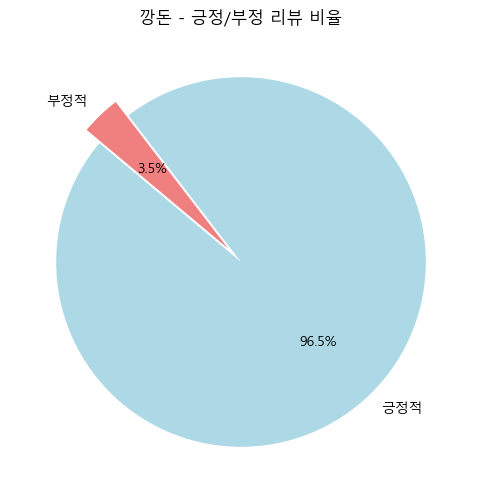

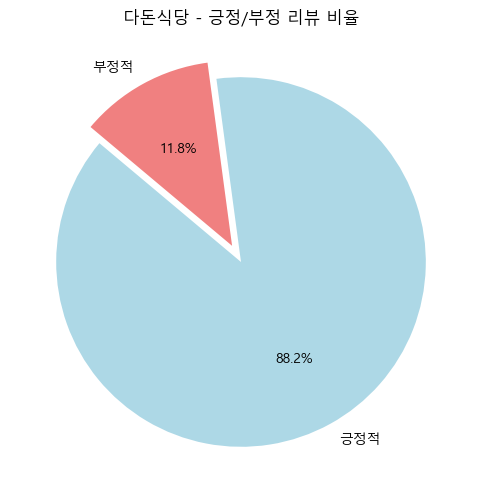

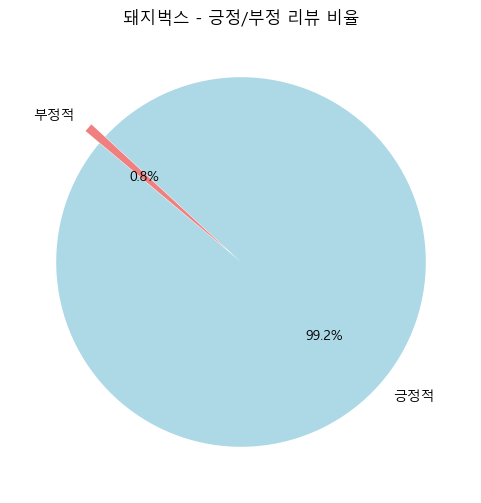

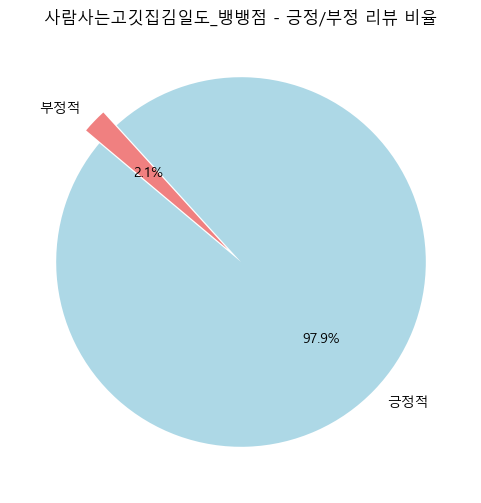

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (맑은 고딕)
rc('font', family='Malgun Gothic')

# 파일 경로
reviews_path = './data/reviews.csv'
stores_path = './data/stores.csv'

# 데이터 로드
reviews = pd.read_csv(reviews_path)
stores = pd.read_csv(stores_path)

# 필터링할 가게 이름들
store_names = ['깡돈', '다돈식당', '돼지벅스', '사람사는고깃집김일도_뱅뱅점']

# stores에서 store_name 필터링
filtered_stores = stores[stores['store_name'].isin(store_names)]

# store_id 필터링
filtered_store_ids = filtered_stores['store_id']
filtered_reviews = reviews[reviews['store_id'].isin(filtered_store_ids)]

# 가게별 긍정적/부정적 비율 계산 및 시각화
for store_id, store_name in zip(filtered_stores['store_id'], filtered_stores['store_name']):
    # 해당 가게의 리뷰 필터링
    store_reviews = filtered_reviews[filtered_reviews['store_id'] == store_id]
    
    # 긍정적/부정적 비율 계산 (알 수 없음 무시)
    sentiment_counts = store_reviews['final_sentiment'].value_counts(normalize=True) * 100
    sentiment_counts = sentiment_counts[['긍정적', '부정적']].dropna()  # '알 수 없음' 제외
    
    # 시각화를 위해 비율 데이터 준비
    sentiment_labels = sentiment_counts.index
    sentiment_values = sentiment_counts.values
    
    # 색상 및 강조 설정 (부정적 강조)
    colors = ['#ADD8E6' if label == '긍정적' else '#F08080' for label in sentiment_labels]
    explode = [0.1 if label == '부정적' else 0 for label in sentiment_labels]
    
    # 파이 차트 그리기
    plt.figure(figsize=(6, 6))
    plt.pie(
        sentiment_values, 
        labels=sentiment_labels, 
        autopct='%.1f%%', 
        colors=colors, 
        startangle=140, 
        explode=explode
    )
    plt.title(f"{store_name} - 긍정/부정 리뷰 비율")
    plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (맑은 고딕)
rc('font', family='Malgun Gothic')

# 파일 경로
reviews_path = './data/reviews.csv'
stores_path = './data/stores.csv'

# 저장 경로
save_path = r'C:\study\fintech\final_project\data\사진\2_부정리뷰_비율'

# 데이터 로드
reviews = pd.read_csv(reviews_path)
stores = pd.read_csv(stores_path)

# 필터링할 가게 이름들
store_names = ['깡돈', '다돈식당', '돼지벅스', '사람사는고깃집김일도_뱅뱅점']

# stores에서 store_name 필터링
filtered_stores = stores[stores['store_name'].isin(store_names)]

# store_id 필터링
filtered_store_ids = filtered_stores['store_id']
filtered_reviews = reviews[reviews['store_id'].isin(filtered_store_ids)]

# 가게별 긍정적/부정적 비율 계산 및 시각화
for store_id, store_name in zip(filtered_stores['store_id'], filtered_stores['store_name']):
    # 해당 가게의 리뷰 필터링
    store_reviews = filtered_reviews[filtered_reviews['store_id'] == store_id]
    
    # 긍정적/부정적 비율 계산 (알 수 없음 무시)
    sentiment_counts = store_reviews['final_sentiment'].value_counts(normalize=True) * 100
    sentiment_counts = sentiment_counts[['긍정적', '부정적']].dropna()  # '알 수 없음' 제외
    
    # 시각화를 위해 비율 데이터 준비
    sentiment_labels = sentiment_counts.index
    sentiment_values = sentiment_counts.values
    
    # 색상 및 강조 설정 (부정적 강조)
    colors = ['#ADD8E6' if label == '긍정적' else '#F08080' for label in sentiment_labels]
    explode = [0.1 if label == '부정적' else 0 for label in sentiment_labels]
    
    # 파이 차트 그리기
    plt.figure(figsize=(6, 6))
    plt.pie(
        sentiment_values, 
        labels=sentiment_labels, 
        autopct='%.1f%%', 
        colors=colors, 
        startangle=140, 
        explode=explode
    )
    plt.title(f"{store_name} - 긍정/부정 리뷰 비율")
    
    # 이미지 저장
    filename = f"{save_path}\\{store_name}_리뷰_비율.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()


# 워드 클라우드

In [10]:
!pip install wordcloud

In [18]:
import os

font_path = 'C:/Users/sms01/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
NanumBarunGothicBold.ttf
print(os.path.exists(font_path))


True


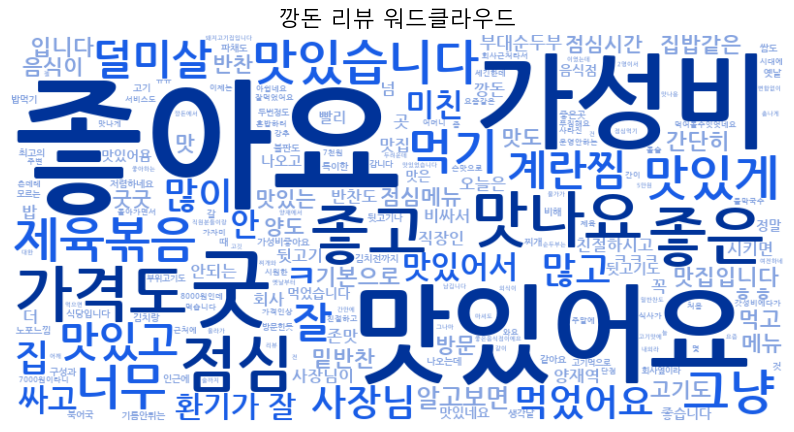

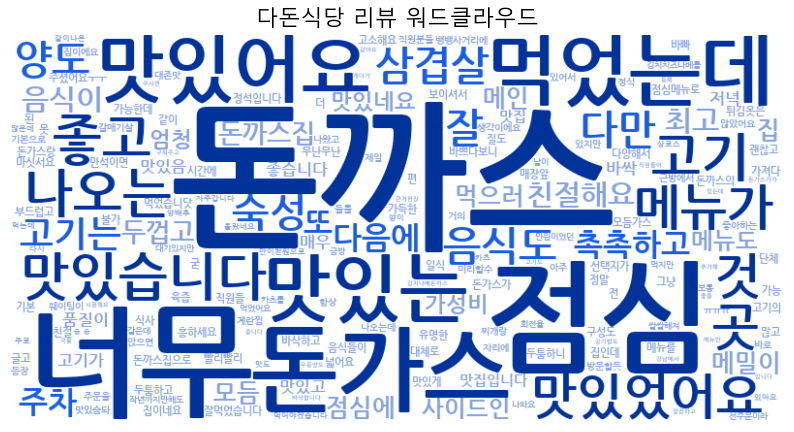

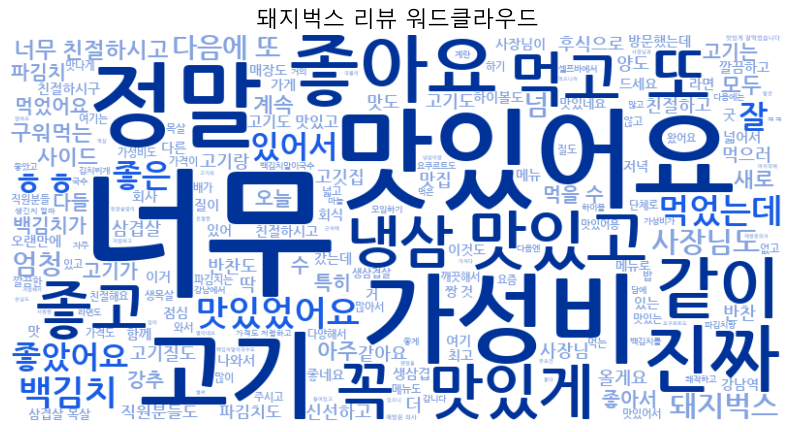

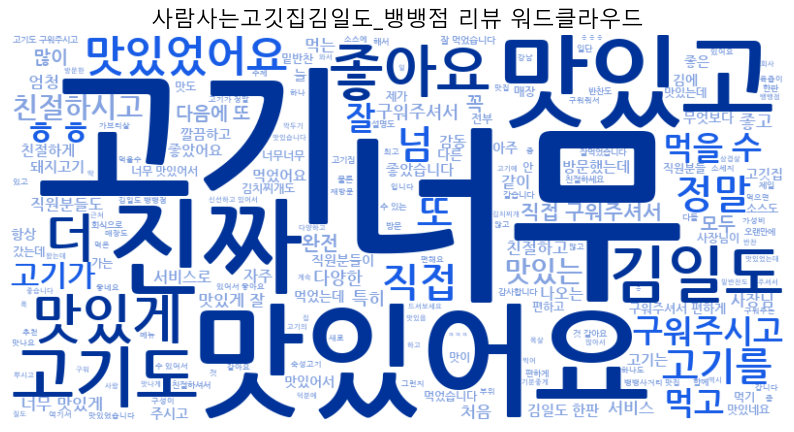

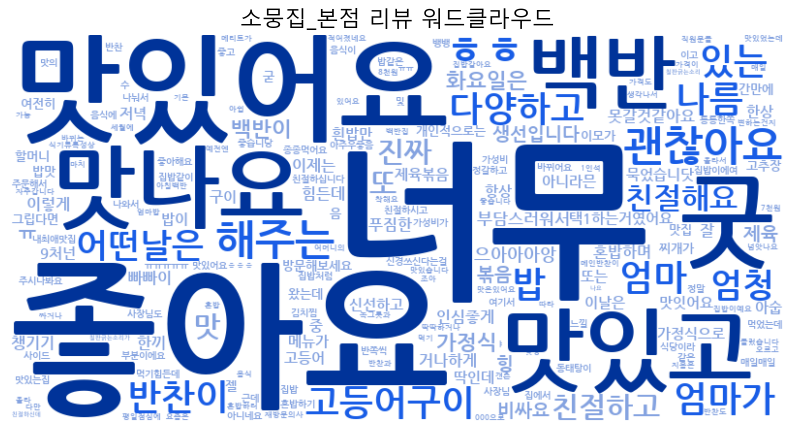

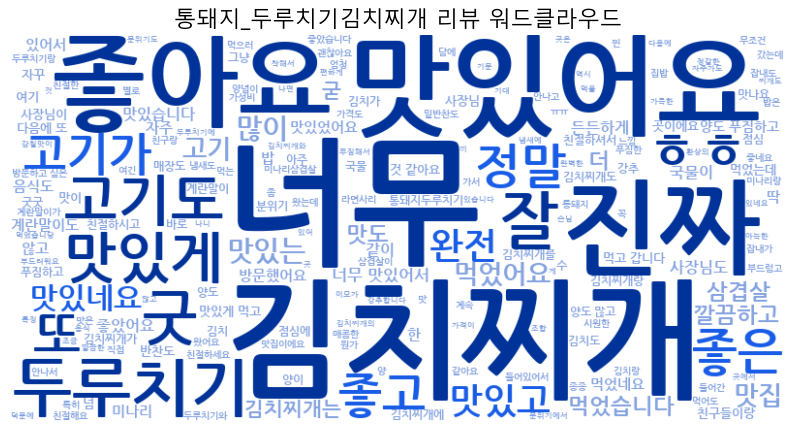

In [27]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 로드
store_data = pd.read_csv('./data/stores.csv')
review_data = pd.read_csv('./data/reviews.csv')

# 불용어 리스트 정의
stopwords = ['있다', '입니다', '이', '그', '저', '그리고', '다', '를', '은', '는', '에', '와', '으로', '에서', '이다']

# 사용자 정의 컬러 함수
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 단어 크기(글자 크기)를 기준으로 밝기 설정
    if font_size > 50:  # 큰 글씨는 진한 파란색
        return f"hsl(220, 100%, {30}%)"
    elif font_size > 30:  # 중간 글씨는 보통 파란색
        return f"hsl(220, 80%, {50}%)"
    else:  # 작은 글씨는 연한 파란색
        return f"hsl(220, 60%, {70}%)"

# store_name으로 store_id 찾기
target_stores = ["깡돈", "다돈식당", "돼지벅스", "사람사는고깃집김일도_뱅뱅점", "소뭉집_본점", "통돼지_두루치기김치찌개"]
store_ids = store_data[store_data['store_name'].isin(target_stores)][['store_id', 'store_name']]

# 가게별 워드클라우드 생성
for _, row in store_ids.iterrows():
    store_id = row['store_id']
    store_name = row['store_name']

    # 해당 가게의 리뷰 텍스트 추출
    store_reviews = review_data[review_data['store_id'] == store_id]['review_text'].dropna()
    combined_text = " ".join(store_reviews)

    if combined_text.strip():  # 비어있지 않은 경우에만 생성
        # 불용어 제거
        words = combined_text.split()
        filtered_words = [word for word in words if word not in stopwords]
        filtered_text = " ".join(filtered_words)

        # 워드클라우드 생성
        wordcloud = WordCloud(
            font_path='C:/Users/sms01/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf',  # 한글 폰트 경로
            width=800,
            height=400,
            background_color='white',
            prefer_horizontal=1.0,  # 글자를 가로로만 출력
            color_func=custom_color_func  # 사용자 정의 색상 함수 적용
        ).generate(filtered_text)

        # 그래프 출력
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"{store_name} 리뷰 워드클라우드", fontsize=16)
        plt.axis('off')
        plt.show()
    else:
        print(f"{store_name}에는 리뷰가 없습니다.")


In [29]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터 로드
store_data = pd.read_csv('./data/stores.csv')
review_data = pd.read_csv('./data/reviews.csv')

# 불용어 리스트 정의
stopwords = ['있다', '입니다', '이', '그', '저', '그리고', '다', '를', '은', '는', '에', '와', '으로', '에서', '이다']

# 사용자 정의 컬러 함수
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 단어 크기(글자 크기)를 기준으로 밝기 설정
    if font_size > 50:  # 큰 글씨는 진한 파란색
        return f"hsl(220, 100%, {30}%)"
    elif font_size > 30:  # 중간 글씨는 보통 파란색
        return f"hsl(220, 80%, {50}%)"
    else:  # 작은 글씨는 연한 파란색
        return f"hsl(220, 60%, {70}%)"

# 저장 경로 설정
output_path = r'C:\study\fintech\final_project\data\사진\1_워드클라우드'

# 저장 경로 확인 및 생성
if not os.path.exists(output_path):
    os.makedirs(output_path)

# store_name으로 store_id 찾기
target_stores = ["깡돈", "다돈식당", "돼지벅스", "사람사는고깃집김일도_뱅뱅점"]
store_ids = store_data[store_data['store_name'].isin(target_stores)][['store_id', 'store_name']]

# 가게별 워드클라우드 생성
for _, row in store_ids.iterrows():
    store_id = row['store_id']
    store_name = row['store_name']

    # 해당 가게의 리뷰 텍스트 추출
    store_reviews = review_data[review_data['store_id'] == store_id]['review_text'].dropna()
    combined_text = " ".join(store_reviews)

    if combined_text.strip():  # 비어있지 않은 경우에만 생성
        # 불용어 제거
        words = combined_text.split()
        filtered_words = [word for word in words if word not in stopwords]
        filtered_text = " ".join(filtered_words)

        # 워드클라우드 생성
        wordcloud = WordCloud(
            font_path=r'C:\Users\sms01\AppData\Local\Microsoft\Windows\Fonts\NanumGothicBold.ttf',  # 한글 폰트 경로
            width=800,
            height=400,
            background_color='white',
            prefer_horizontal=1.0,  # 글자를 가로로만 출력
            color_func=custom_color_func  # 사용자 정의 색상 함수 적용
        ).generate(filtered_text)

        # 그래프 출력 및 저장
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"{store_name} 리뷰 워드클라우드", fontsize=16)
        plt.axis('off')
        
        # 이미지 저장
        save_file = os.path.join(output_path, f"{store_name}_워드클라우드.png")
        plt.savefig(save_file, dpi=300, bbox_inches='tight')
        plt.close()  # 메모리 해제
    else:
        print(f"{store_name}에는 리뷰가 없습니다.")
